In [1]:
import pandas as pd #
import numpy as np #
import seaborn as sns #
from sklearn.tree import DecisionTreeClassifier
import warnings #
warnings.filterwarnings('ignore') #


from matplotlib import pyplot as plt #
from sklearn import tree

In [2]:
df = pd.read_excel('game.xlsx')

In [3]:
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [4]:
df.drop('Days',axis=1,inplace=True)

In [5]:
df.head(10)

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [6]:
x = df.drop('Wear Jacket?',axis=1)

In [7]:
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [8]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [9]:
y = df[['Wear Jacket?']]

In [10]:
y.head()

,Wear Jacket?
0,No
1,Yes
2,No
3,Yes
4,Yes


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
from pandas.core.dtypes.common import is_numeric_dtype

In [14]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    else:
        x[col] = le.fit_transform(x[col])

In [15]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [16]:
#sunny>>>1 cloudy 0
#cold>>0 warm>>1
#Indoor>>0 outdoor>>1

In [17]:
clf = DecisionTreeClassifier()

In [18]:
clf.fit(x,y)

DecisionTreeClassifier()

In [19]:
clf.predict([[0,0,0]])

array(['Yes'], dtype=object)

In [20]:
clf.predict([[0,0,1]])

array(['Yes'], dtype=object)

In [21]:
clf.predict([[1,0,0]])

array(['No'], dtype=object)

In [22]:
clf.predict([[1,1,0]])

array(['No'], dtype=object)

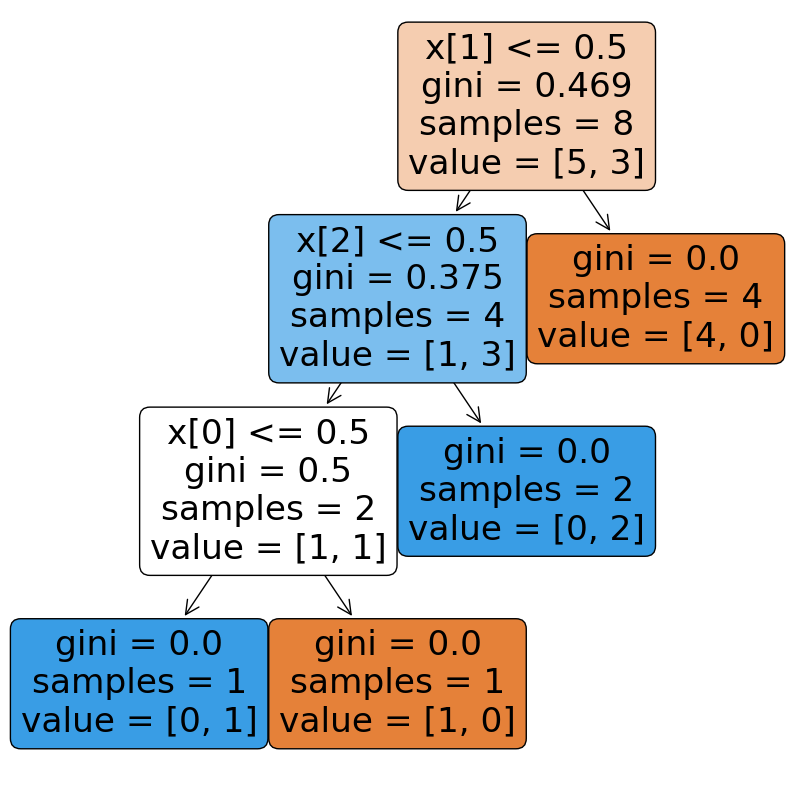

In [23]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True,rounded=True)
plt.savefig('te.png',dpi=1200)